## This notebook is derived from Yasser Hessein's excellent notebook on water quality. If you like this, please upvote that notebook also!
https://www.kaggle.com/yasserhessein/water-quality-classification-using-feyn
Thanks Yasser Hessein!

<h1 style='background-color:#7FADC4 ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Water Quality Classification using deep_autoviml    </h1>
<img src="https://www.sgs.nl/-/media/global/images/structural-website-images/hero-images/hero-water-sample-860px.jpg" width="800px">

## Description


1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


### Dataset Link 
#### [Here](https://www.kaggle.com/adityakadiwal/water-potability)

In [1]:
#!pip install deep_autoviml

In [2]:
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.46
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


## Imports Lab

In [3]:
import pandas as pd
import sklearn.model_selection

## Read the data

In [4]:
df = pd.read_csv('../input/water-potability/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Check for missing values

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Organic_carbon     0.030001
Chloramines        0.023779
Sulfate            0.023577
Hardness           0.013837
Conductivity       0.008128
Trihalomethanes    0.007130
ph                 0.003556
Turbidity          0.001581
Name: Potability, dtype: float64

## Target balance

In [7]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

## Split dataset Train 80% & Test 20% 

In [8]:
train, test = sklearn.model_selection.train_test_split(df,stratify=df["Potability"], train_size=.66, random_state=1)
print(train.shape, test.shape)

(2162, 10) (1114, 10)


# deep_autoviml is an AutoML library for building deep learning models using tensorflow and keras using a single line of code.</h1>
## It will automatically do the following:
- Load a wide variety of performant DNN architectures such as deep and wide, deep and cross models, etc.
- Use a hypertuner named Storm-Tuner to select the best hyper params for each of the model architectures
- Select the best model and add pre-processing layers for feature transformation and do selective feature engineering
- For NLP tasks: it select a BERT or USE model along with text processors
- Train best model and run predictions using the trained model
- You can automatically save the model with its preprocessing layers and load it elsewhere or serve it using tf.serving on Cloud providers
## For more details visit their github: [deep_autoviml](https://github.com/AutoViML/deep_autoviml)

In [9]:
target = 'Potability'

In [10]:
keras_model_type =  "fast1" ## always try "fast" first, then "fast2", "auto", etc.
### always set early_stopping to True first and then change it to False
#### You always need 15 max_trials to get something decent #####
#### always set tuner to "storm" and then "optuna". 
### NLP char limit kicks off NLP processing. Feature Cross later.
project_name = "water_quality"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':False,
                 'max_trials': 10, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}


    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : False
    nlp_char_limit : 50
    max_trials : 10
    tuner : storm
Max Trials is 10 for faster processing. Please increase max_trials if you want more accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying

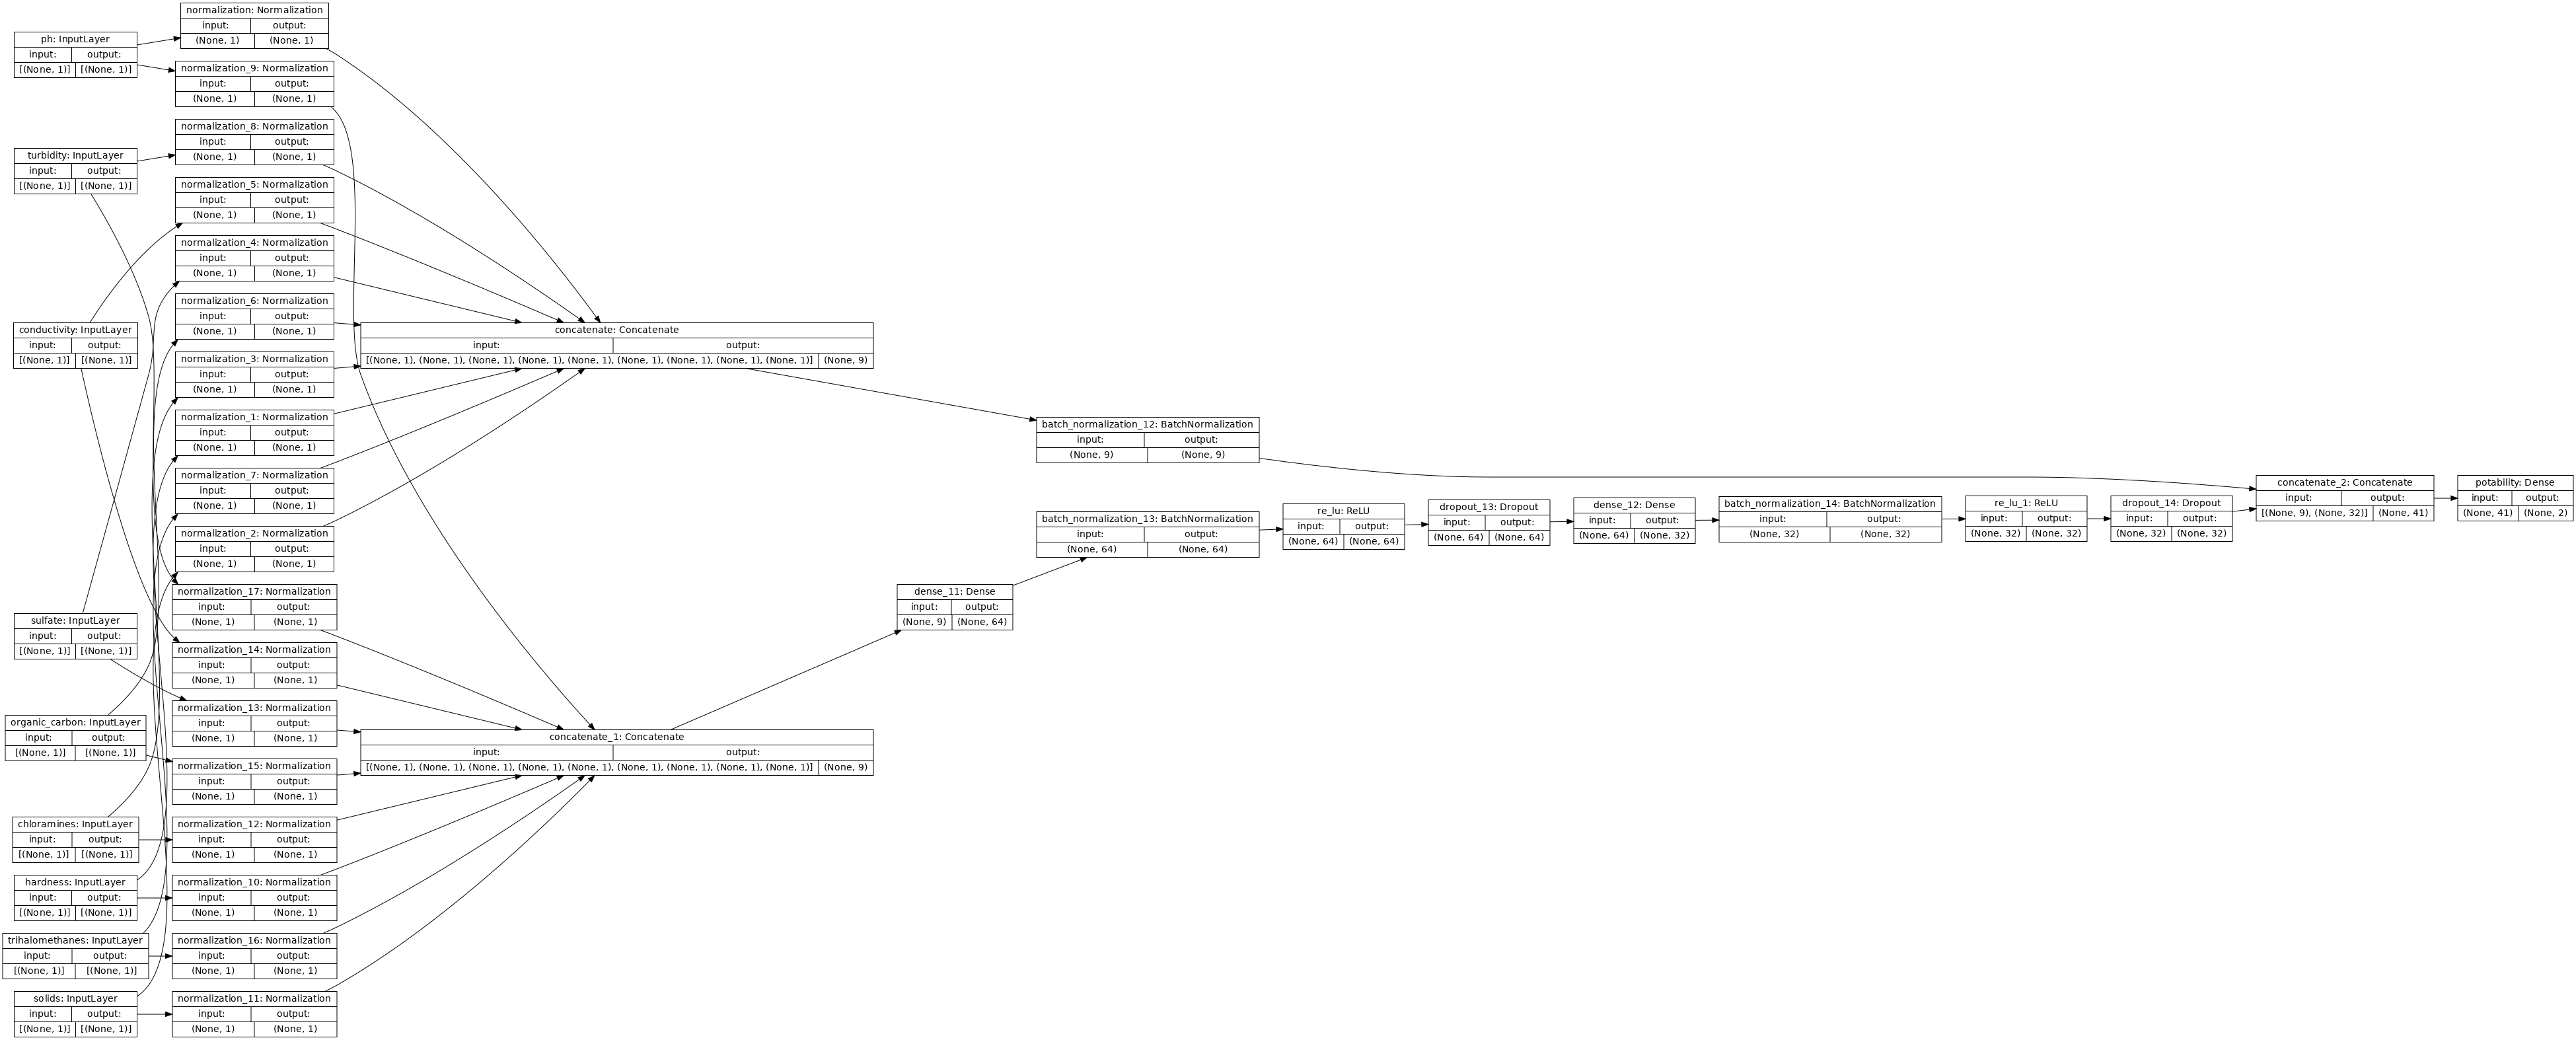

Model plot saved in file: deep_autoviml_water_quality_fast1_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Training a fast1 model option...
    class_weights: {0: 1.0, 1: 1.2823250296559905}
    original datasize = 2162, initial batchsize = 32
    recommended steps per epoch = 33
    recommended OneCycle steps = 6800
    default initializer = lecun_normal, default activation = selu
    Recommended: Increase patience for "onecycle" scheduler
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10.0
    number of epochs = 100, steps per epoch = 33

Splitting train into 80+20 percent: train and validation data
    Splitting validation 

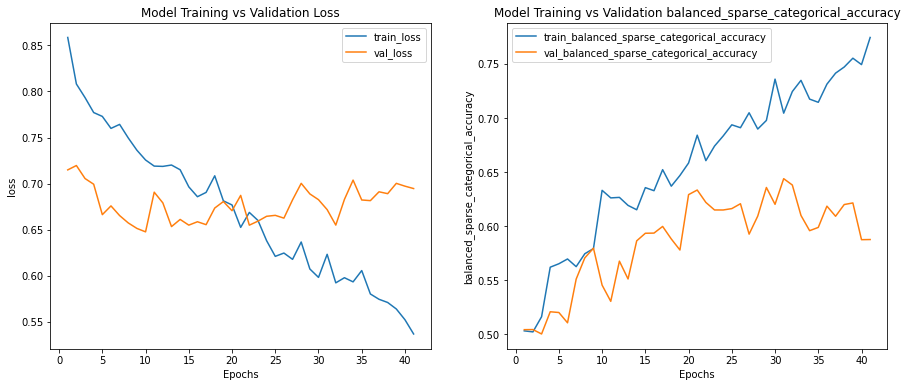


###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Potability
#################################################################


    Accuracy          = 66.1%
    Balanced Accuracy = 64.0%
    Precision         = 53.5%
    Average Precision = 63.7%
    Recall            = 56.1%
    F1 Score          = 54.8%
    ROC AUC           = 67.9%
#####################################################

Training on full train dataset for 31 epochs. This will take time...
    completed. Time taken (in mins) = 0


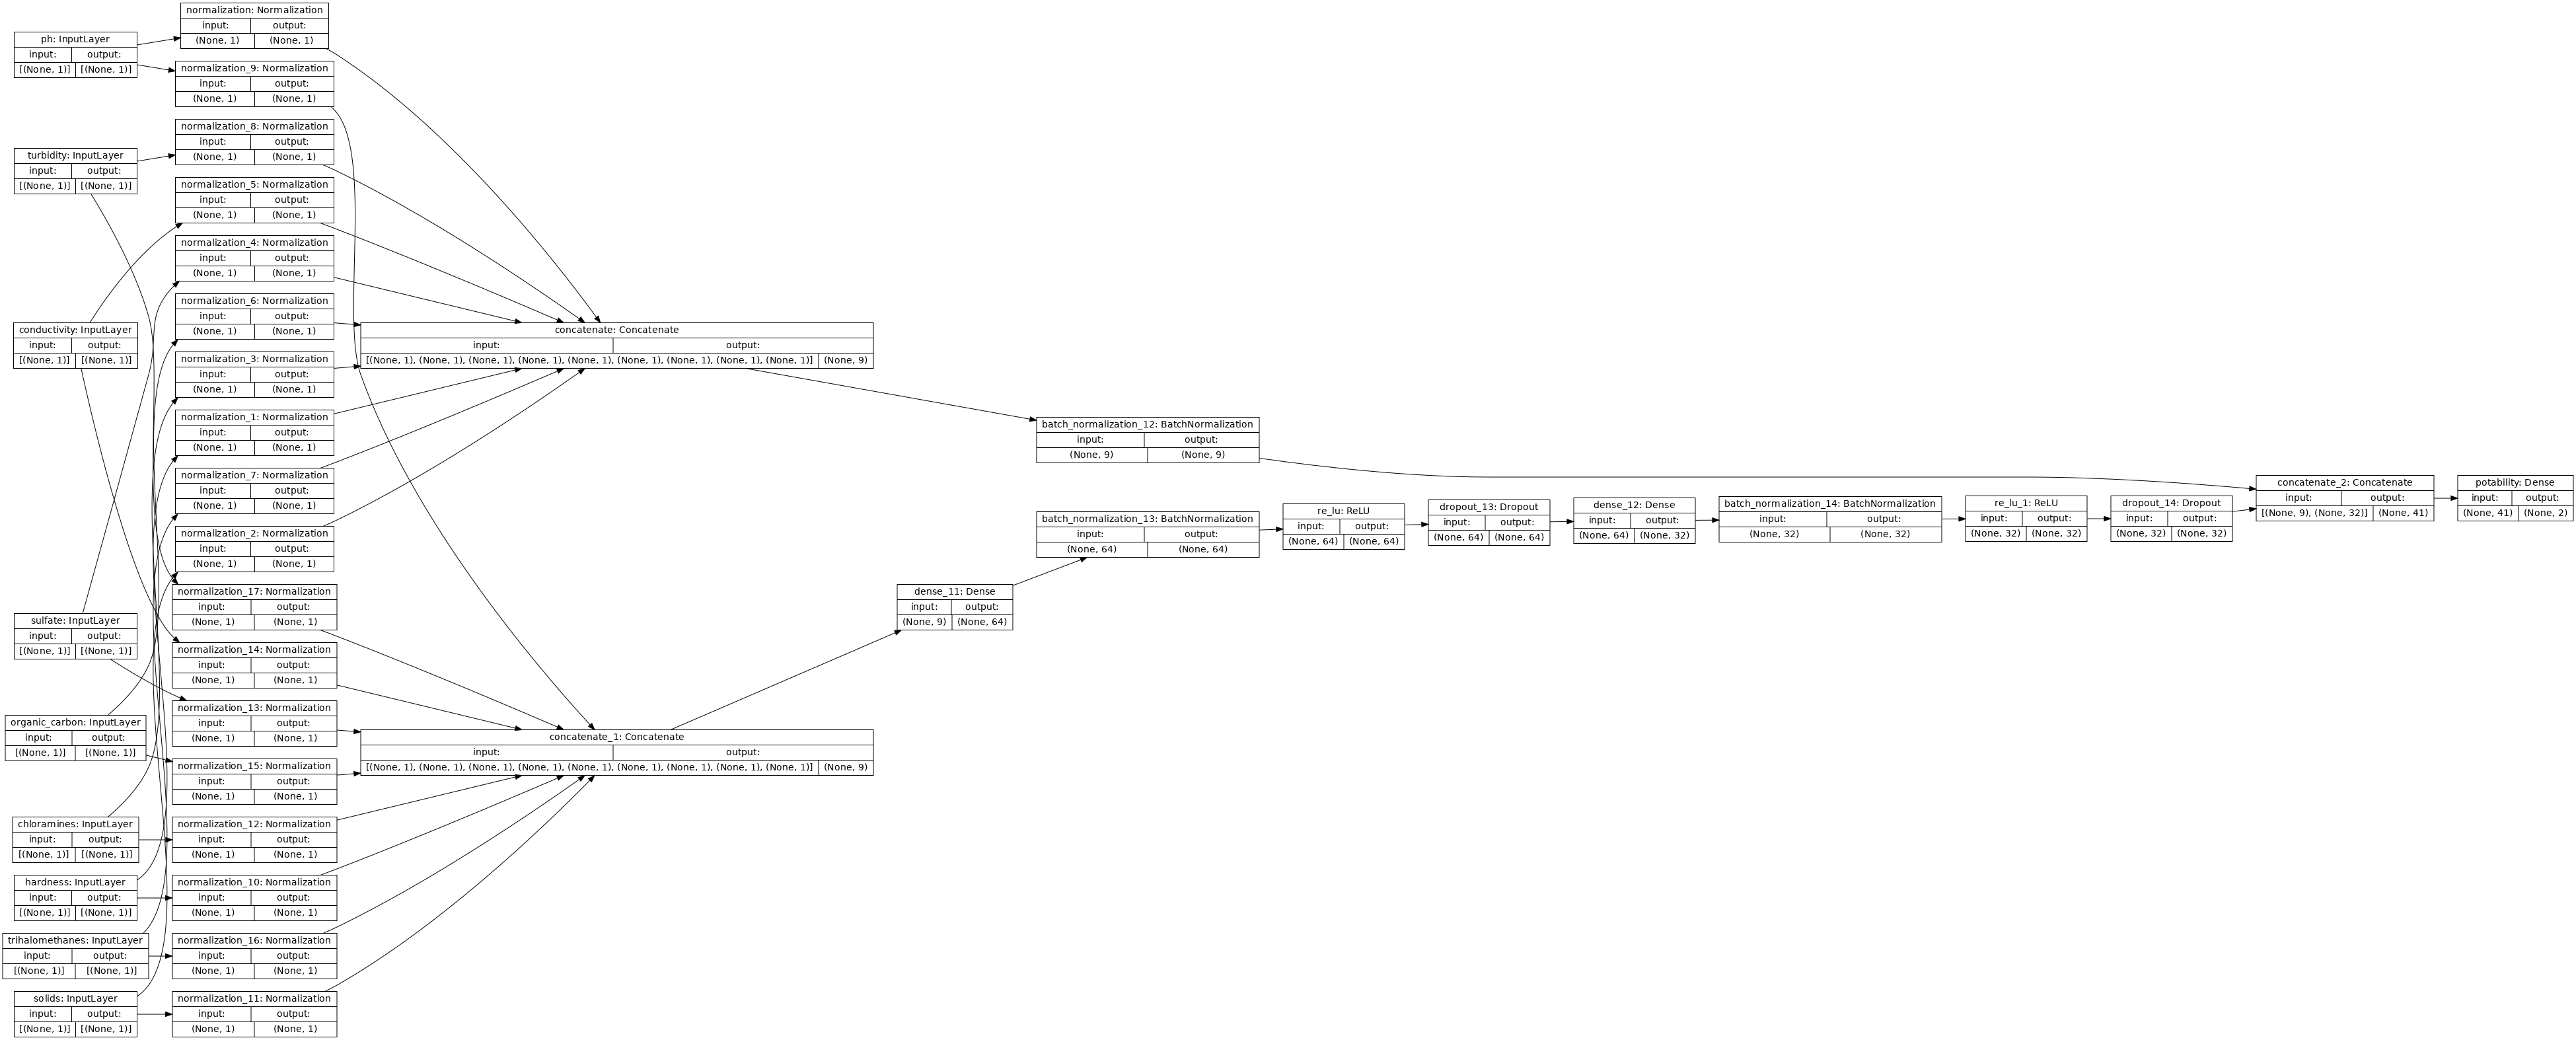

Model plot saved in file: deep_autoviml_water_quality_fast1_model_after.png


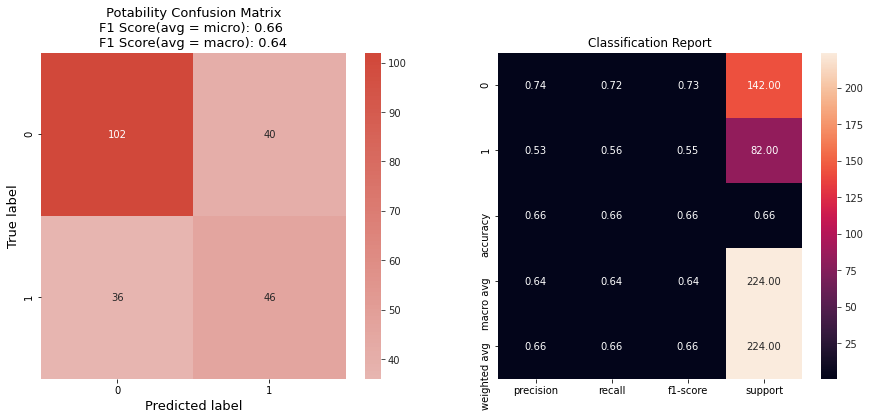

In [11]:
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=1)

## Now let us predict using the best model on test data

In [12]:
predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Using <tensorflow.python.keras.engine.functional.Functional object at 0x7f1cdc4f8910> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 1114
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    test data loaded successfully.
test data size =  1114 , batch_size =  32
    number of steps needed to predict: 35
Returning model predictions in form of a list...of length 2
Time taken in mins for predictions = 0


In [13]:
y_test = test[target].values
y_test

array([1, 0, 1, ..., 1, 1, 0])

In [14]:
y_preds = predictions[-1]
y_preds

array([0, 0, 1, ..., 0, 1, 0])

In [15]:
import numpy as np
labels = np.unique(y_test)
target_names = np.unique(y_test)
labels, target_names

(array([0, 1]), array([0, 1]))

In [16]:
from deep_autoviml.utilities.utilities import plot_classification_results

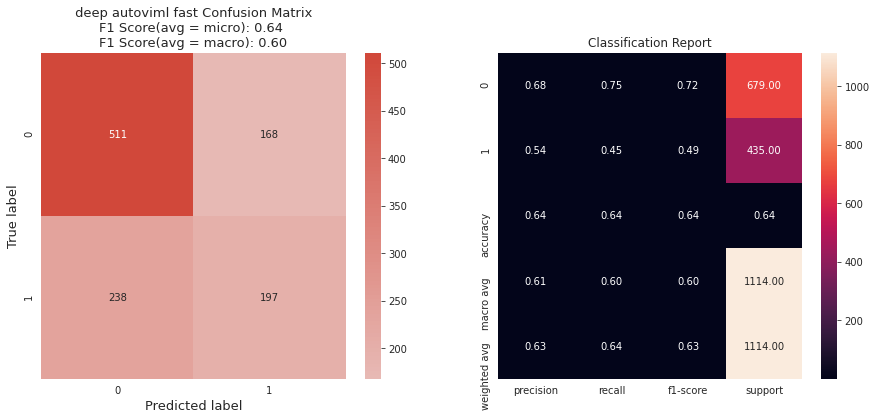

In [17]:
plot_classification_results(y_test, y_preds, 
                            labels, target_names, title_string='deep autoviml fast')

## Summary

## In a couple of lines of code we have built a performant model that provides average precision and recall of 63% - we can try to play around with other keras_model_type as "auto" etc. to get better performance. Try it and see for yourself.